In [7]:
import snscrape.modules.twitter as sntwitter

In [24]:
query = "(Religious hate OR political hate OR gender bias OR hate speech OR caste hate)"
tweets = []
limit = int(input("How many Tweets do you want to collect: "))
# limit = 1000
count = 0

print(f"Collecting {limit} Tweets..")
single_tweet = ""
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    # print(type(vars(tweet)))
    # break
    if len(tweets) == limit:
        single_tweet = tweet
        print("{:.0f}% done".format((count/limit)*100))
        break
    else:
        print("{:.0f}% done".format((count/limit)*100), end="\r")
        count += 1
        a_tweet = vars(tweet)
        for key, value in a_tweet.items():
            # print(key, type(value))
            if ((type(value) != dict) or (type(value) != list)):
                a_tweet[key] = value
        tweets.append(a_tweet)

How many Tweets do you want to collect: 15000
100% done


In [25]:
# Creating dataset from collected tweets

import pandas as pd

df = pd.DataFrame(tweets, columns=[key for key,_ in vars(tweet).items()])
df.to_csv("tweets.csv", index=False)
print("Dataset created from collected tweets..")

Dataset created from collected tweets..


In [6]:
# tweets[1]['mentionedUsers'][0]
# tweets[0]
# tweets[1]
# tweets[1]["mentionedUsers"][0].username

In [26]:
unique_users = {}
cache = {}

count = 0

for tweet in tweets:
    if tweet["user"].id not in cache.keys():
        cache.update({tweet["user"].id: tweet["user"].username})
        unique_users.update({count: {"id":tweet["user"].id, "username":tweet["user"].username}})
        count += 1
    
    if tweet["mentionedUsers"]:
        for user in tweet["mentionedUsers"]:
            if user.id not in cache.keys():
                cache.update({user.id: user.username})
                unique_users.update({count: {"id":user.id, "username":user.username}})
                count += 1
print(f"{count} unique users found in available data")
cache.clear()

26392 unique users found in available data


In [27]:
print(cache)

{}


In [28]:
unique_users

{0: {'id': 1248721064537907200, 'username': 'Waldoman7'},
 1: {'id': 90480218, 'username': 'RichardGrenell'},
 2: {'id': 54704653, 'username': 'oceansidewebtv'},
 3: {'id': 254615390, 'username': 'Bzubyk'},
 4: {'id': 2380549591, 'username': 'itsTim_eh'},
 5: {'id': 811229675758505984, 'username': 'antonioguterres'},
 6: {'id': 1303766372531556354, 'username': 'computistic'},
 7: {'id': 1145326635387883521, 'username': 'HamzaAzhrSalam'},
 8: {'id': 2997533604, 'username': 'sayidelhusseini'},
 9: {'id': 1463346247020908547, 'username': 'syphburn'},
 10: {'id': 1552112672988188672, 'username': 'Toni33184555'},
 11: {'id': 1495510575752749056, 'username': 'Signoret59'},
 12: {'id': 1519291999471472640, 'username': 'VivianneEliza'},
 13: {'id': 147291142, 'username': 'Tashfain1'},
 14: {'id': 248863939, 'username': 'tariqmateen'},
 15: {'id': 18213483, 'username': 'amnesty'},
 16: {'id': 136932734, 'username': 'CMShehbaz'},
 17: {'id': 10228272, 'username': 'YouTube'},
 18: {'id': 12245393

In [29]:
len(unique_users)

26392

In [30]:
rows,cols = len(unique_users),len(unique_users)

graph = [[0]*cols]*rows

print(f"A graph of {rows} x {cols} created..")

A graph of 26392 x 26392 created..


In [70]:
# for row in graph:
#     print(row)

In [33]:
def return_count(uid):
    for key,value in unique_users.items():
        if value["id"]==uid:
            return key
            break

# print(return_count(1554550723043594246))

In [34]:
for tweet in tweets:
    rowNumber = return_count(tweet["user"].id)
    if tweet["mentionedUsers"]:
        for user in tweet["mentionedUsers"]:
            colNumber = return_count(user.id)
            graph[rowNumber][colNumber] = 1

In [89]:
# for row in graph:
#     print(row)

In [35]:
import numpy as np

adjacency_matrix = np.array(graph)

print(adjacency_matrix)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [37]:
## Save the output numpy array in .npy file for quick access in future

from numpy import save

save("data.npy", adjacency_matrix)
print("Adjacency Matrix stored in data.npy file as NumPy Array..")

Adjacency Matrix stored in data.npy file as NumPy Array..


In [1]:
### Continue from here after 'notebook' shutdown, if there is no change in chched data
import numpy as np

## Restore 'adjacency_matrix' from data.npy file

from numpy import load

adjacency_matrix = load("data.npy")
print(adjacency_matrix)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [39]:
print(f"Size: {len(adjacency_matrix)} X {len(adjacency_matrix[0])}")
print(type(adjacency_matrix))

Size: 26392 X 26392
<class 'numpy.ndarray'>


In [40]:
## Creating a 100x100 sub-array from 'adjacency_matrix' for easy visualisation of the graph

temp_adj_m = []
for i in range(100):
    temp_adj_m.append(adjacency_matrix[i][:100])

adj_m = np.array(temp_adj_m)

In [42]:
print(adj_m)
print("================================")
print(f"Sub-array size: {len(adj_m)} X {len(adj_m[0])}")

[[0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 ...
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]]
Sub-array size: 100 X 100


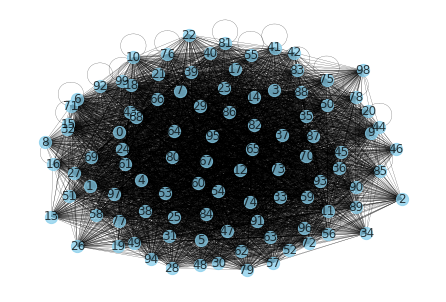

<Figure size 7200x7200 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix==1)
    edges = zip(rows.tolist(), cols.tolist())
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, node_size=150, with_labels=True, node_color="skyblue", width=0.25, alpha=0.75, edge_color="black")
    plt.figure(figsize=(100,100))
    plt.show()

# show_graph_with_labels(adjacency_matrix)
show_graph_with_labels(adj_m)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
[0, 1, 2, 3, 4]
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1

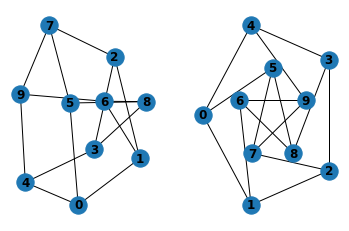

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

print(G.nodes)
print(G.edges)
nx.draw(G)

G = nx.complete_graph(5)

print(G.nodes)
print(G.edges)
nx.draw(G)

G = nx.petersen_graph()

print(G.nodes)
print(G.edges)

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight="bold")
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight="bold")